In [2]:
# ==================================================
# Paso 1: Librerías que vamos a necesitar
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# ==================================================
# Paso 2: Configuramos el logging
# ==================================================

logging.basicConfig(level=logging.INFO, format = "%(levelname)s: %(message)s")

# ==================================================
# Paso 3: Configuramos la estetica de seaborn
# ==================================================

sns.set(style = "whitegrid")

# ==================================================
# Paso 4: Cargamos el dataset con el que vamos a trabajar
# ==================================================

try:
    df = pd.read_csv("../DATA/CLEAN_DATA/datos_covid_transformados.csv")
    logging.info(f"Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas")
except Exception as e:
    logging.error(f"No se pudo cargar el dataset: {e}")



INFO: Dataset cargado con 289 filas y 1148 columnas


In [3]:
df.head()

,Provincia,País,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Casos_totales
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,129988469
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,185562654
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,182741650
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,24547525
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,60025203


In [6]:
# ==================================================
# Paso 5: Filtrar países con más de 1 millón de casos
# ==================================================

try:
    
    df_paises = df[df["Provincia"].isna()] #Dataframe con filas donde no hay provincias, solo países.
    df_top = df_paises[df_paises["Casos_totales"]>1_000_000] #Del dataframe de paises, ahora cogemos los que tengan casos totales > 1millon
    
    #Mandamos el logging con el número de filas de df_top que será el número de países con mas de 1millon
    logging.info(f"Filtrado de {df_top.shape[0]} países con más de 1 millón de casos")

except Exception as e:
    logging.error(f"Error al filtrar datos: {e}")





INFO: Filtrado de 190 países con más de 1 millón de casos


In [11]:
df_top[["País", "Casos_totales"]]

,País,Casos_totales
0,Afghanistan,129988469
1,Albania,185562654
2,Algeria,182741650
3,Andorra,24547525
4,Angola,60025203
...,...,...
283,Vietnam,4314591370
284,West Bank and Gaza,412543696
286,Yemen,7879435
287,Zambia,195953683


In [12]:
# ==================================================
# Paso 3: Agrupar por país
# ==================================================

try:
    #Agrupamos por país al mismo tiempo que sumamos todos los casos de cada uno, ordenamos de mayor a menor y resetamos el indice para que se ordenen.
    df_agrupado = df.groupby("País")["Casos_totales"].sum().sort_values(ascending = False).reset_index() 
    logging.info("Datos agrupados por país y ordenados de mayor a menor")
except Exception as e:
    logging.error(f"No se pudo realizar la agrupación: {e}")

INFO: Datos agrupados por país y ordenados de mayor a menor


In [13]:
df_agrupado.head(10)

,País,Casos_totales
0,US,53813184406
1,India,29131119694
2,Brazil,21182690594
3,France,16105911886
4,Germany,13686043720
5,United Kingdom,12118271679
6,Russia,10578569842
7,Italy,10083161678
8,Turkey,8840742699
9,"Korea, South",8467888968


C:\Users\fjavi\AppData\Local\Temp\ipykernel_20584\1045555994.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_top_10, x = "Casos_totales", y="País", palette = "Reds_r")


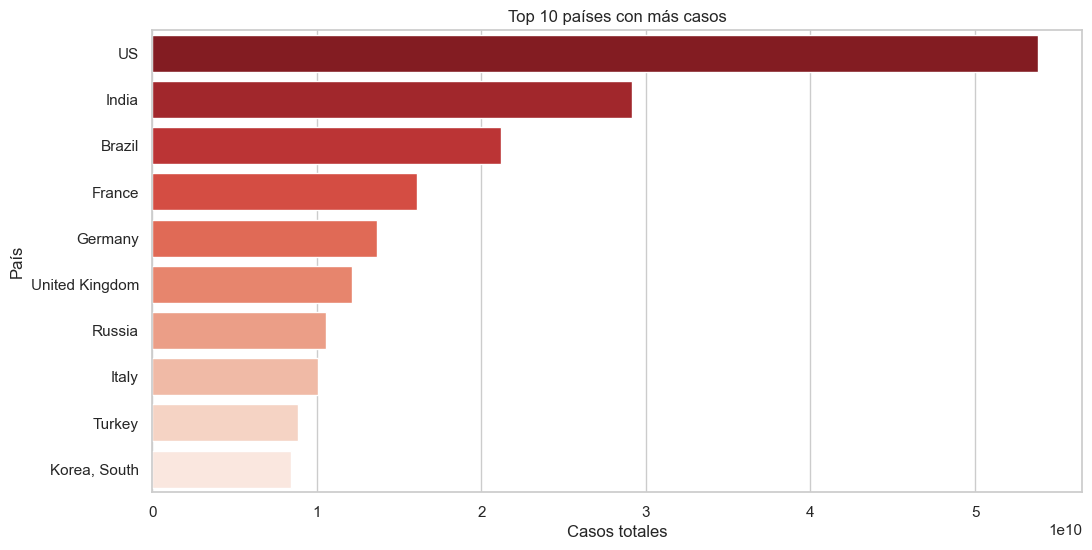

In [15]:
# ==================================================
# Paso 4: Gráfico de barras
# ==================================================

df_top_10 = df_agrupado.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data = df_top_10, x = "Casos_totales", y="País", palette = "Reds_r")
plt.title("Top 10 países con más casos")
plt.xlabel("Casos totales")
plt.ylabel("País")
plt.show()



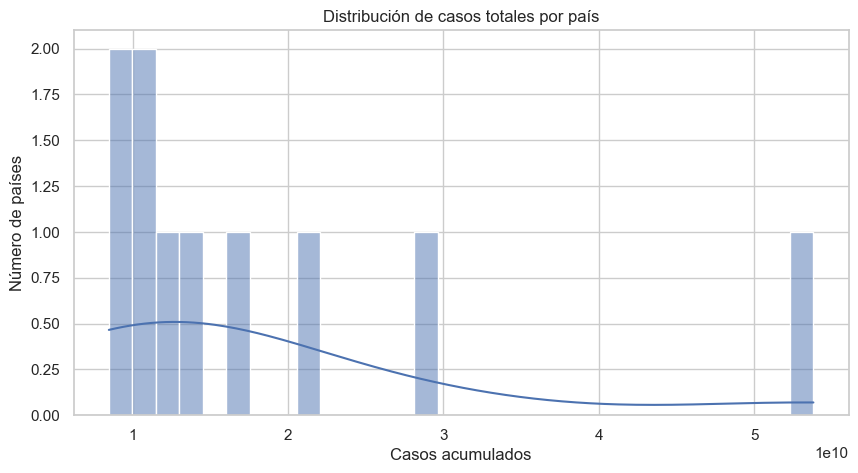

In [21]:
# ==================================================
# Paso 5: Histograma de distribución de casos
# ==================================================

plt.figure(figsize=(10,5))
sns.histplot(df_top_10['Casos_totales'], bins=30, kde=True)
plt.title("Distribución de casos totales por país")
plt.xlabel("Casos acumulados")
plt.ylabel("Número de países")
plt.show()

In [ ]:
# ==================================================
# Paso 6: Guardar dataset filtrado
# ==================================================



In [23]:
try:
    df_top_10.to_csv("../DATA/CLEAN_DATA/top_paises_con_covid.csv")
    logging.info("Dataset filtrado con los 10 países con más covid guardado")
except Exception as e:
    logging.error(f"No se pudo guardar el dataset filtrado del top 10: {e}")

INFO: Dataset filtrado con los 10 países con más covid guardado
